# Downloading and Prepping Data <a id="2"></a>

Import primary modules.

In [100]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Download the dataset and read it into a *pandas* dataframe.

In [101]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.

In [102]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


**Question 1:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

In [103]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [104]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#split data
df_continents = df_can.loc[:,['Continent','2013']].groupby('Continent', axis=0).sum()
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,2013
Continent,
Africa,38543
Asia,155075
Europe,28691
Latin America and the Caribbean,24950
Northern America,8503


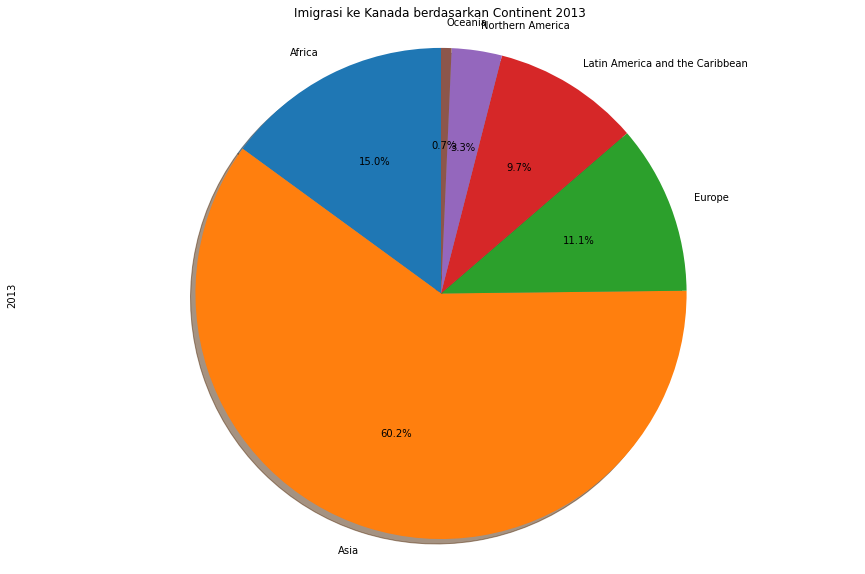

In [105]:
#PLotting Data
df_continents['2013'].plot(kind='pie',figsize=(15, 10),autopct='%1.1f%%',startangle=90,shadow=True,)

plt.title('Imigrasi ke Kanada berdasarkan Continent 2013')
plt.axis('equal')

plt.show()

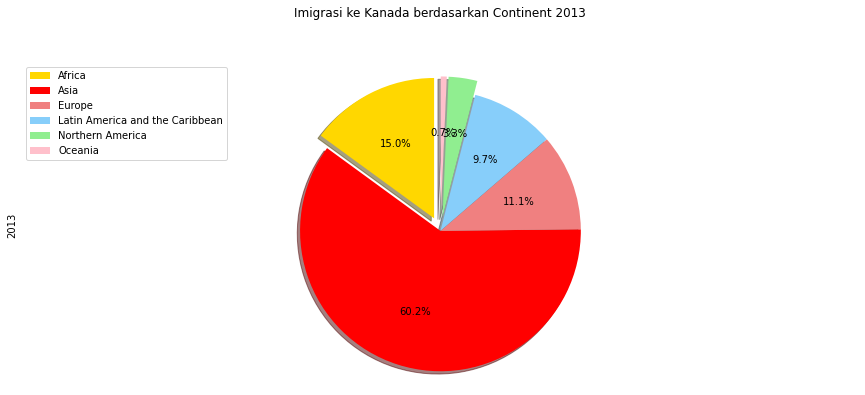

In [106]:
colors_list = ['gold', 'red', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]
df_continents['2013'].plot(kind='pie',figsize=(15, 6),autopct='%1.1f%%', startangle=90,shadow=True,labels=None,colors=colors_list,explode=explode_list)
plt.title('Imigrasi ke Kanada berdasarkan Continent 2013', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_continents.index, loc='upper left') 
plt.show()

**Question 2:** Compare the distribution of the number of immigrants from Pakistan and Afghanistan from 1980 to 2013.

Step 1: Get the dataset for Pakistan and Afghanistan and call the dataframe **df_PA**.

In [107]:
df_PA = df_can.loc[['Pakistan','Afghanistan']]
df_PA.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639


Step 2: Plot data.

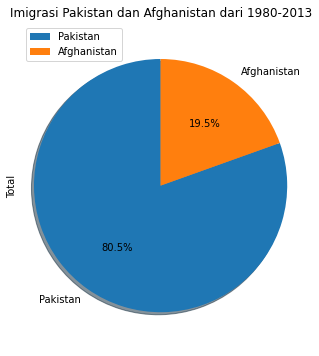

In [108]:
### type your answer here
df_PA['Total'].plot(kind='pie',figsize=(5, 6),autopct='%1.1f%%',startangle=90,shadow=True,)
plt.title('Imigrasi Pakistan dan Afghanistan dari 1980-2013')
plt.axis('equal')
plt.legend(labels=df_PA.index, loc='upper left') 
plt.show()




**Question 3**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [109]:
### type your answer here
df_countries=df_can.loc[['Denmark','Norway','Sweden']]
df_countries.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140,5866


In [110]:
df_total= pd.DataFrame(df_countries[years].sum(axis=0))
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace = True)
df_total.columns = ['year', 'total']
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

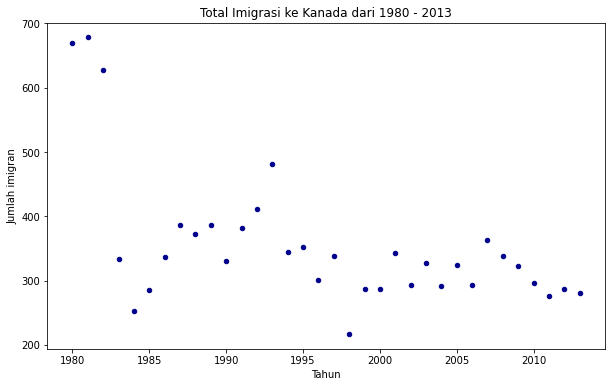

In [111]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
plt.title('Total Imigrasi ke Kanada dari 1980 - 2013')
plt.xlabel('Tahun')
plt.ylabel('Jumlah imigran')

plt.show()

**Question 4**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [112]:
df_can_t = df_can[years].transpose()
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,"China, Hong Kong Special Administrative Region","China, Macao Special Administrative Region",...,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,State of Palestine,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav Republic of Macedonia,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,702,234,0,26,0,83,372,0,511,16,2,0,44,0,10,211,79,24,2,0,1,12,9,0,4,0,1233,5123,0,0,...,6,241,0,0,7,1026,211,185,0,20,15,4,281,806,315,0,56,0,5,2,958,58,481,0,0,13,0,0,22045,635,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,639,238,0,23,2,84,376,0,540,27,5,0,52,0,1,220,6,20,1,0,1,19,2,0,3,0,1069,6682,0,0,...,6,301,0,0,10,1118,299,371,0,12,10,1,308,811,419,0,53,0,5,4,947,51,874,0,1,16,0,2,24796,832,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,484,201,0,38,1,86,299,0,519,13,4,0,42,0,3,192,8,12,3,0,2,26,16,0,1,1,1078,3308,0,0,...,7,337,0,0,7,781,260,290,0,11,21,1,222,634,409,0,113,0,2,7,972,55,706,0,0,17,0,2,20620,621,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,317,117,0,12,1,81,244,0,297,21,3,0,49,0,3,139,2,33,2,0,0,33,7,0,0,0,781,1863,0,0,...,3,169,0,0,12,379,133,197,0,7,12,0,176,370,269,0,65,0,3,1,766,46,280,0,0,38,0,1,10015,474,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,317,127,0,21,1,98,265,0,183,37,4,1,38,0,7,145,2,11,3,1,11,10,8,0,0,0,681,1527,0,0,...,12,128,0,0,14,271,137,1086,0,23,5,10,128,326,264,0,82,0,6,2,606,51,338,0,1,32,0,2,10170,473,6661,90,0,0,142,7583,0,0,16,32


In [113]:
norm_china = (df_can_t['China'] - df_can_t['China'].min()) /(df_can_t['China'].max() - df_can_t['China'].min())
norm_india = (df_can_t['India'] - df_can_t['India'].min()) /(df_can_t['India'].max() - df_can_t['India'].min())

Step 2: Generate the bubble plots.

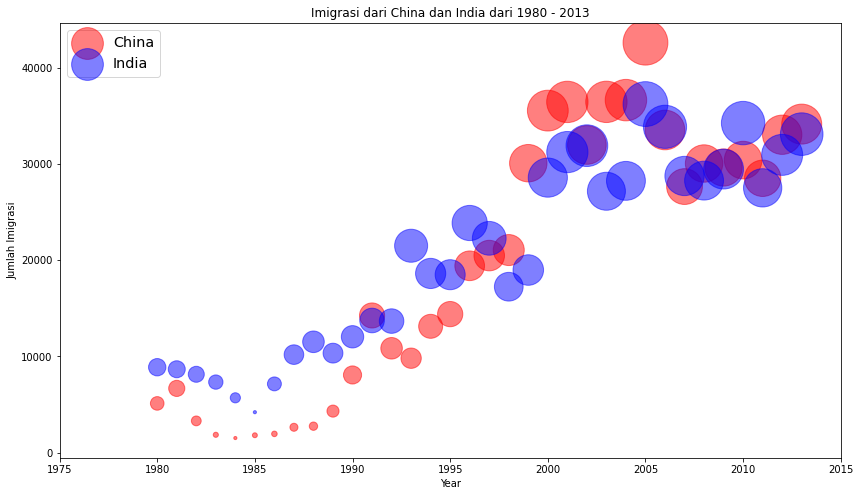

In [115]:
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,
                    color='red',
                    s=norm_china * 2000 + 10,
                    xlim=(1975, 2015)
                    )

ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color='blue',
                    s=norm_india * 2000 + 10,
                    ax = ax0
                    )

ax0.set_ylabel('Jumlah Imigrasi')
ax0.set_title('Imigrasi dari China dan India dari 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize= 'x-large')

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).